In [1]:
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def normalize(dataSet):
    '''
    Function
    ---
    This function is to mormalized the raw data.
    It project features of samples into a range from 0 to 1
    
    Parameter
    ---
    dataSet: a numpy array represents input feature
    Return: normalized X
    '''
    
    num_samples = dataSet.shape[0]
    # calculate the extreme value of each column (feature)
    min_vals, max_vals = dataSet.min(0), dataSet.max(0) 
    ranges = max_vals - min_vals
    
    normed = dataSet - np.tile(min_vals, (num_samples, 1))
    normed = normed / np.tile(ranges, (num_samples, 1))
    
    #print("!!!: ", normed.shape)
    
    return normed, min_vals, ranges

def dist_cal(input_vect, dataSet):
    '''
    Function
    ---
    Calculate the Euclidean distance between samples
    
    Parameters
    ---
    input_vect: input of kNN model for prediction
    dataSet: given dataset for training
    '''
    
    num_samples = dataSet.shape[0]
    dist = np.tile(input_vect, (num_samples, 1)) - dataSet
    dist = dist ** 2
    dist = dist.sum(-1) # calculate the sum of each row
    dist = dist ** 0.5
    return dist

def my_kNN(k, input_vect, dataSet, labels):
    '''
    Function
    ---
    The main function to implement kNN algorithm
    It is the naive version that it calculates all the distance directly
    
    Parameters
    ---
    k: the number of neighbors considered
    input_vect: input of kNN model for prediction
    dataSet: given dataset for training
    lables: given labels
    '''
    
    # normalize input and dataset
    
    #print(input_vect.shape)
    #print(dataSet.shape)
    
    (dataSet, min_vals, ranges) = normalize(dataSet)
    
    # !!! the normalizarion of input needs to consistent with the dataset !!!
    input_vect = (input_vect - min_vals) / ranges
    #print(input_vect.shape)
    #print(dataSet.shape)
    
    # calculate Euclidean Distance
    dist = dist_cal(input_vect, dataSet)
    
    # sort the calculated distance
    sortedDist = np.argsort(dist)
    
    # Select the nearst k samples
    votes = {}
    for i in range(k):
        vote_label = labels[sortedDist[i]]
        votes[vote_label] = votes.get(vote_label, 0) + 1
    sortedVotes = sorted(votes.items(), key=operator.itemgetter(1), reverse=True)
    print("Votes:", votes)
    return sortedVotes[0][0]

In [3]:
# read data from csv and convert pd.DataFrame to ndarray
# each row of dataset is a sample while each column represents one of the features or label
data = pd.read_csv('datingTestSet2.csv')
data = data.as_matrix()
#data, labels = data[:,0:-1], data[:, -1]
#print(data.shape)
#print(labels.shape)

# check the data type
if isinstance(data, np.ndarray):
    print(data.shape)

(1000, 4)


In [4]:
'''
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [11, 12, 13]])
X = normalize(X)
print(X)
'''

classes = ["Dislike", "OK", "Charming"]
testSamples = np.array([[80000, 5, 1.5], [40000, 15, 1.5], [5000, 5, 1.5], [23000, 7, 1.5]])
predict = []
for i in range(testSamples.shape[0]):
    pred = int(my_kNN(5, testSamples[i], data[:, 0:-1], data[:, -1]))
    predict.append(pred)
    print("Smaple %d is %s \n"%(i+1, classes[pred-1]))

Votes: {1.0: 5}
Smaple 1 is Dislike 

Votes: {3.0: 5}
Smaple 2 is Charming 

Votes: {2.0: 5}
Smaple 3 is OK 

Votes: {2.0: 2, 3.0: 3}
Smaple 4 is Charming 



(342,)
(331,)
(327,)


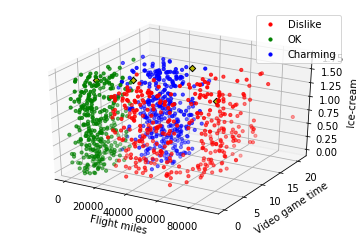

In [5]:
'''
To separate different types, an interesting function is used
np.where()
input: condition
output: a tuple (array of index, data type)
This may avoid data type conversion
'''
#plt.style.use('ggplot')

# data analysis, plot the scatter, assign different colour to different types
c = ['r', 'g', 'b']
fig = plt.figure()
# 3d plot
ax = fig.add_subplot(111, projection="3d")
for i in range(len(c)):
    #x = np.asarray([j for j in data if j[-1] == i+1])
    index = np.where(data[:,-1] == i+1)
    print(index[0].shape)
    ax.scatter(data[index,0], data[index,1], data[index,2], c=c[i], label=c[i], s=10)
for i in range(testSamples.shape[0]):
    ax.scatter(testSamples[i, 0], testSamples[i, 1], testSamples[i, 2], c="y", marker="D", edgecolor='k')
ax.set_xlabel("Flight miles")
ax.set_ylabel("Video game time")
ax.set_zlabel("Ice-cream")
ax.legend(["Dislike", "OK", "Charming"])
plt.show()

(342,)
(331,)
(327,)


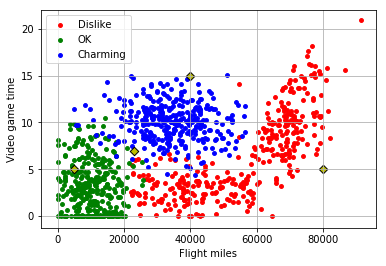

In [6]:
# 2d plot
fig2 = plt.figure()
ax = fig2.add_subplot(111)
for i in range(len(c)):
    #x = np.asarray([j for j in data if j[-1] == i+1])
    index = np.where(data[:,-1] == i+1)
    print(index[0].shape)
    ax.scatter(data[index[0],0], data[index[0],1], c=c[i], label=c[i], s=15)
for i in range(testSamples.shape[0]):
    ax.scatter(testSamples[i, 0], testSamples[i, 1], c="y", marker="D", edgecolor='k')
ax.set_xlabel("Flight miles")
ax.set_ylabel("Video game time")
ax.legend(["Dislike", "OK", "Charming"])
ax.grid(True)
plt.show()

# Some notes

## Key points

- The input feature vector should be normalized exactly the same as training data set. That means we need the min/max values of training dataset to normalize the input feature vector

## Improvements and future study

So far (2018/3/4), code above has implemented a simple kNN classifier. But this implementaiton has obvious drawbacks.
- It can only handle a small dataset based on which all the distance values will be calculated.
- A prediction function or modification of data orgnized in this model is needed to handle a series of inputset
- The aim of kNN is to divid the feature space based on training data. 
- Possibly a kNN regressor?

## Reference
- [scikit-learn](http://scikit-learn.org/stable/modules/neighbors.html)